1. 

51
100
105
256


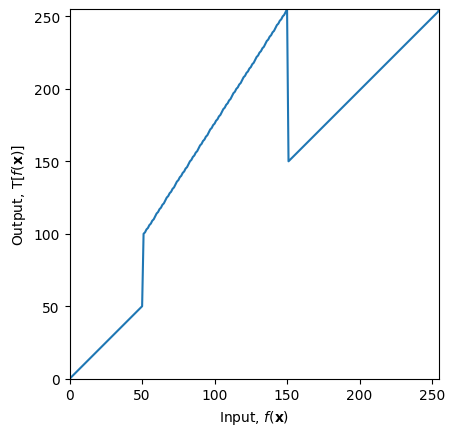

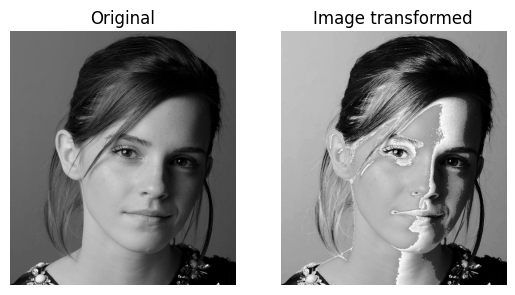

In [8]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50,50),(50,100),(150,255),(150,150)])#cordinates of the line segments in transformation

t1 = np.linspace(0, c[0,1], c[0,0]+1 -0).astype('uint8')#create array of 51 numbers having values form 0 -50
print(len(t1))
t2 = np.linspace(c[1,1], c[2,1], c[2,0]- c[1,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[3,1],255,255 - c[3,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1,t2), axis =0).astype('uint8')
transform = np.concatenate((transform,t3), axis =0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')

img_org = cv.imread('emma.jpg',cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_org, cmap ='gray')
ax[0].set_title('Original')
ax[0].axis('off')
image_transformed=cv.LUT(img_org, transform)
ax[1].imshow(image_transformed, cmap ='gray')
ax[1].set_title('Image transformed')
ax[1].axis('off')

plt.show()